In [51]:
import pandas as pd
import numpy as np 


In [52]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

In [53]:
filepath =  os.sep.join(data_path + ['Iris_Data.csv'])
data =  pd.read_csv(filepath,sep = ',', header=0)

In [54]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [55]:
skew = pd.DataFrame(data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > 0.75
skew

,skew,too_skewed
sepal_length,0.314911,False
sepal_width,0.334053,False
petal_length,-0.274464,False
petal_width,-0.104997,False


In [56]:
data.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [57]:
skewq =  pd.DataFrame(data.skew())


In [58]:
type(skewq)

pandas.core.frame.DataFrame

In [59]:
skewq.head()

,0
sepal_length,0.314911
sepal_width,0.334053
petal_length,-0.274464
petal_width,-0.104997


In [60]:
skewq.tail()

,0
sepal_length,0.314911
sepal_width,0.334053
petal_length,-0.274464
petal_width,-0.104997


In [61]:
len(skewq)

4

In [62]:
skewqq = pd.DataFrame(data.skew(None))

In [63]:
skewqq

,0
sepal_length,0.314911
sepal_width,0.334053
petal_length,-0.274464
petal_width,-0.104997


In [64]:
kd = pd.DataFrame(data.kurtosis())

In [65]:
skewqq.columns

RangeIndex(start=0, stop=1, step=1)

In [66]:
skewqq.columns = ['skew']

In [67]:
skewqq

,skew
sepal_length,0.314911
sepal_width,0.334053
petal_length,-0.274464
petal_width,-0.104997


In [68]:
skewqq['too_skewed'] = skewqq['skew'] > .75

In [69]:
skewqq

,skew,too_skewed
sepal_length,0.314911,False
sepal_width,0.334053,False
petal_length,-0.274464,False
petal_width,-0.104997,False


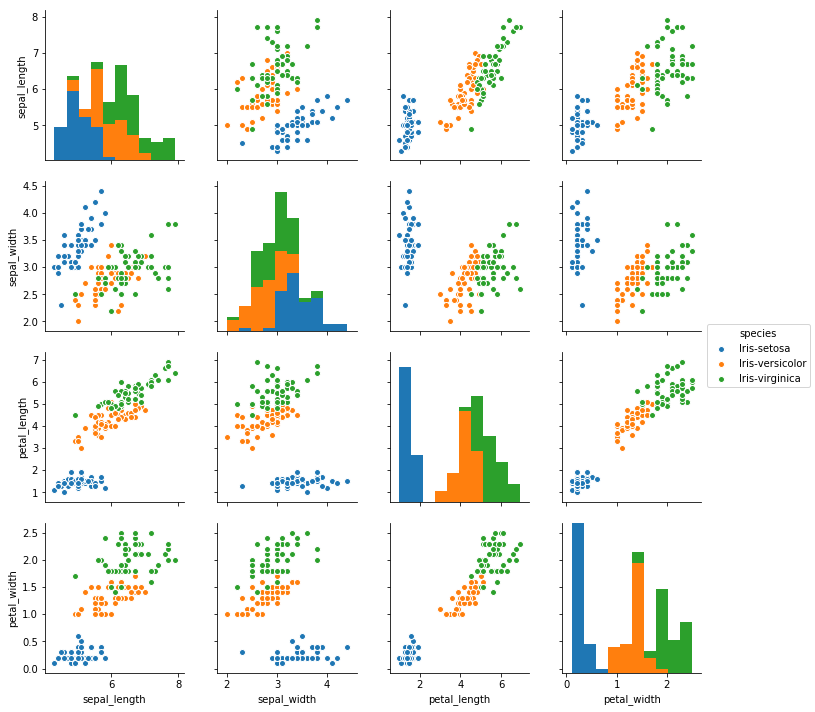

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

In [71]:
kd

,0
sepal_length,-0.552064
sepal_width,0.290781
petal_length,-1.401921
petal_width,-1.339754


In [72]:
skewqq.columns

Index(['skew', 'too_skewed'], dtype='object')

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


In [74]:
X = data[data.columns[:-1]]

In [75]:
y = data.species

In [76]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [77]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [78]:
print(data.groupby('species').count())

                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50


In [79]:
print(data.groupby('species').sum())

                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             250.3        170.9          73.2         12.2
Iris-versicolor         296.8        138.5         213.0         66.3
Iris-virginica          329.4        148.7         277.6        101.3


In [80]:
print(data.groupby('species'))

In [81]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [82]:
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [83]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [84]:
XX = data[data.columns[:0]]

In [85]:
XX

""
0
1
2
3
4
5
6
7
8
9


In [87]:
GNB = GaussianNB()
cv_n = 4
scores = cross_val_score(GNB, X,y, n_jobs=cv_n, cv=cv_n)
print(scores)
np.mean(scores)

[ 0.94871795  0.94871795  0.91666667  1.        ]


0.95352564102564097

In [91]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
X = data[data.columns[:-1]]
y =  data['species']
yy =  data.species
yy

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [89]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [92]:
nb =  {'gaussian':  GaussianNB(), 'bernoulli': BernoulliNB(), 'multinomial': MultinomialNB()}
scores = {}


In [97]:
cv_n = 4 # if you put 8 in cv will get same result 
for key, model in nb.items():
    s =  cross_val_score(model, X,y, cv =  cv_n, n_jobs= cv_n, scoring='accuracy')
    print(s)
    scores[key] =  np.mean(s)

scores

[ 0.9047619   1.          0.94444444  0.94444444  0.94444444  0.88888889
  1.          1.        ]
[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333]
[ 1.          1.          0.94444444  0.88888889  0.88888889  0.88888889
  1.          1.        ]


{'bernoulli': 0.33333333333333331,
 'gaussian': 0.95337301587301582,
 'multinomial': 0.95138888888888884}

In [99]:
X = data[['sepal_length','sepal_width']]
y = data.species
nb =  {'gaussian':  GaussianNB(), 'bernoulli': BernoulliNB(), 'multinomial': MultinomialNB()}
scores = {}

cv_n = 4
for key, model in nb.items():
    s =  cross_val_score(model, X,y, cv=  cv_n, n_jobs = cv_n, scoring='accuracy')
    print(s)
    scores [key] =  np.mean(s)
print(scores)

[ 0.74358974  0.76923077  0.77777778  0.86111111]
[ 0.33333333  0.33333333  0.33333333  0.33333333]
[ 0.69230769  0.66666667  0.66666667  0.69444444]
{'gaussian': 0.7879273504273504, 'bernoulli': 0.33333333333333331, 'multinomial': 0.68002136752136755}


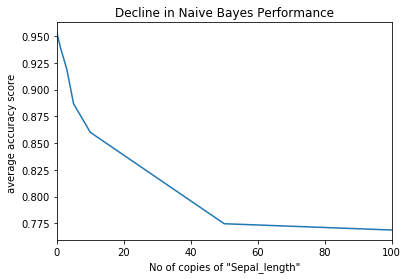

In [108]:
X= data[data.columns[:-1]]
y =  data.species
n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_sepal_length(X, n ):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_copy%s' %i ] = X['sepal_length']
    return X_new 


def get_cross_val_score(n):
    X_new  = create_copies_sepal_length(X,n)
    scores = cross_val_score(GaussianNB(), X_new,y, cv = cv_n, n_jobs = cv_n)
    return np.mean(scores)

avg_score =  pd.Series([get_cross_val_score(n) for n in n_copies], index = n_copies)

#avg_scores = pd.Series([get_cross_val_score(n) for n in n_copies],index=n_copies)
    

ax =  avg_score.plot()

ax.set( 
    xlabel = 'No of copies of "Sepal_length"', ylabel='average accuracy score ', title= 'Decline in Naive Bayes Performance')